In [1]:
"""
Advanced regression task. Here I analyze kc_house_data.csv


"""

'\nAdvanced regression task. Here I analyze kc_house_data.csv\n\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

data = pd.read_csv('../../kc_house_data.csv')
print(f"Dataset shape: {data.shape}")
display(data.head())

Dataset shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
"""
Explore the structure and statistics of the house data
"""
print("\nBasic Statistics:")
display(data.describe())


Basic Statistics:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


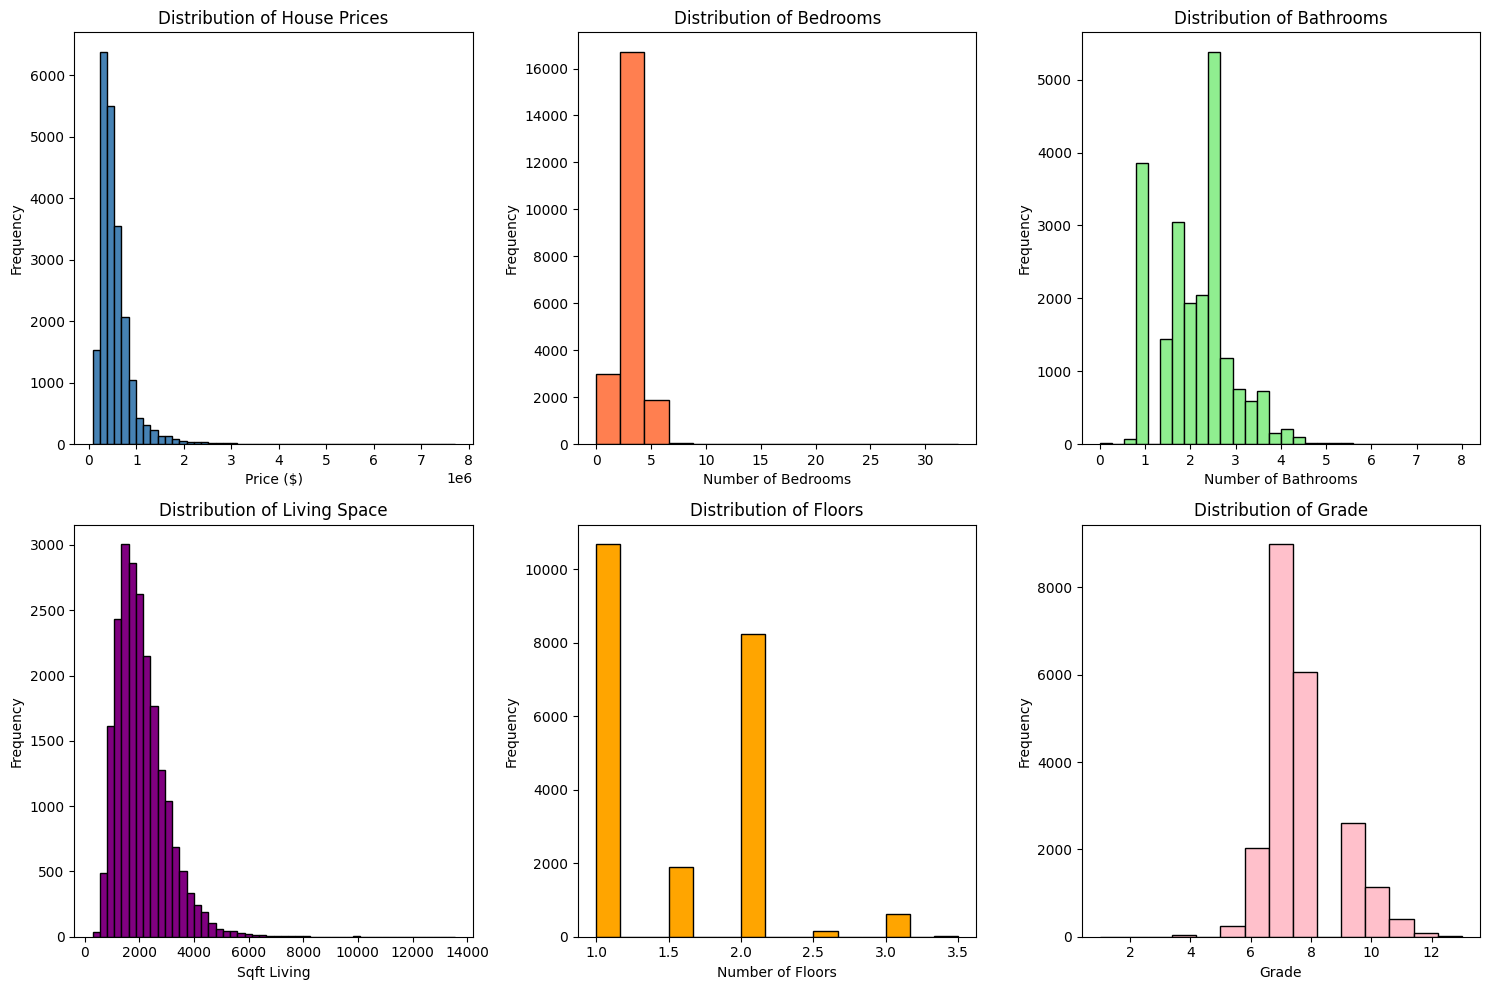

In [4]:
"""
Visualize distributions of price and key features
"""
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Price distribution
axes[0, 0].hist(data['price'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of House Prices')

# Bedrooms
axes[0, 1].hist(data['bedrooms'], bins=15, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Bedrooms')

# Bathrooms
axes[0, 2].hist(data['bathrooms'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_xlabel('Number of Bathrooms')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Bathrooms')

# Square feet living
axes[1, 0].hist(data['sqft_living'], bins=50, color='purple', edgecolor='black')
axes[1, 0].set_xlabel('Sqft Living')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Living Space')

# Floors
axes[1, 1].hist(data['floors'], bins=15, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Number of Floors')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Floors')

# Grade
axes[1, 2].hist(data['grade'], bins=15, color='pink', edgecolor='black')
axes[1, 2].set_xlabel('Grade')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Grade')

plt.tight_layout()
plt.show()


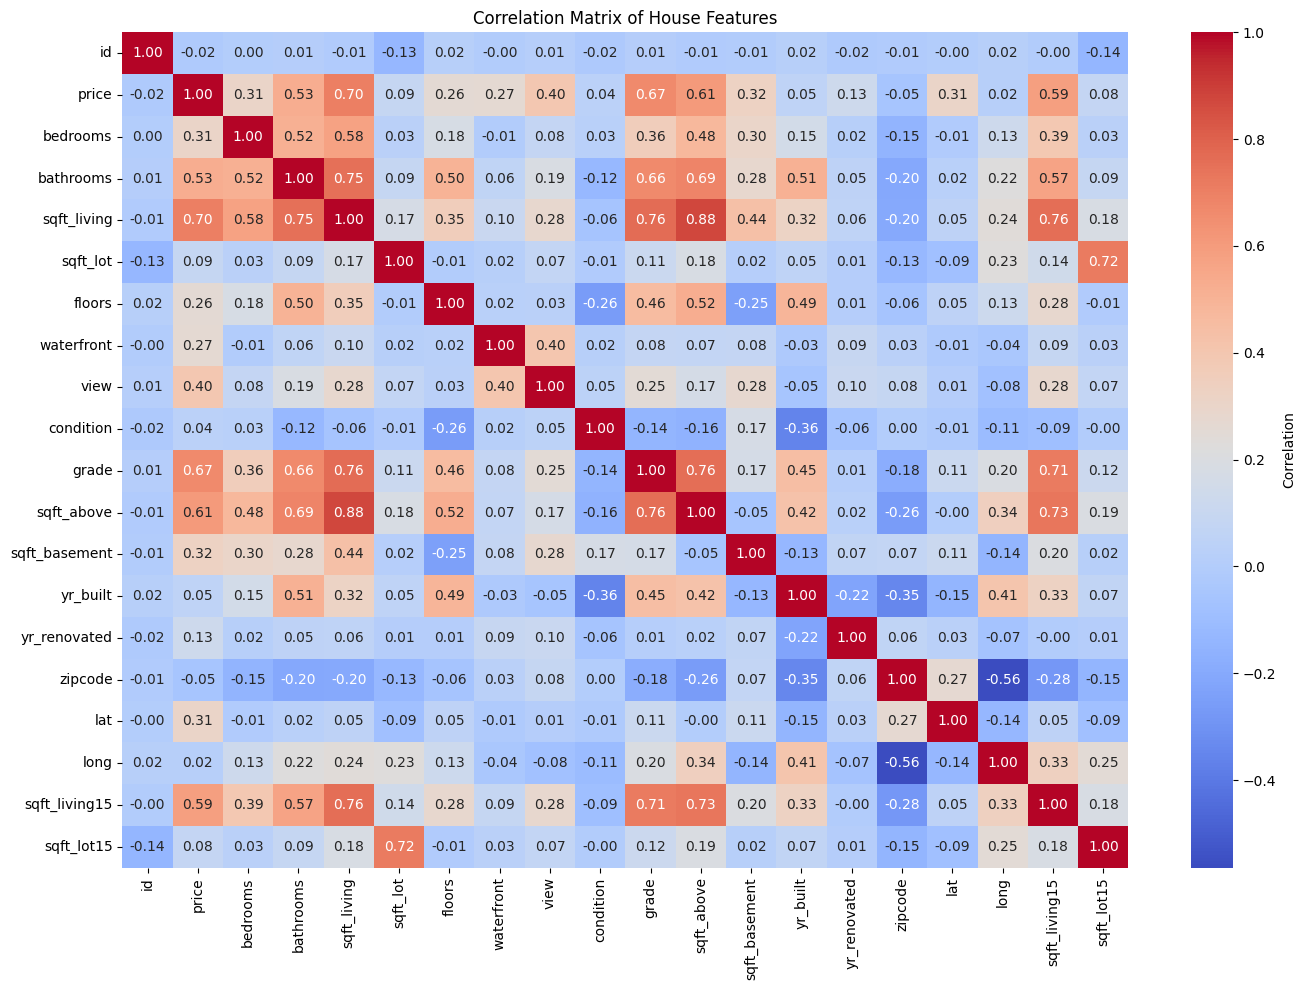


Top 10 Features Correlated with Price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64


In [5]:
"""
Analyze correlations between features and price
"""
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of House Features')
plt.tight_layout()
plt.show()

# Top correlations with price
print("\nTop 10 Features Correlated with Price:")
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr.head(11))  # 11 to exclude price itself



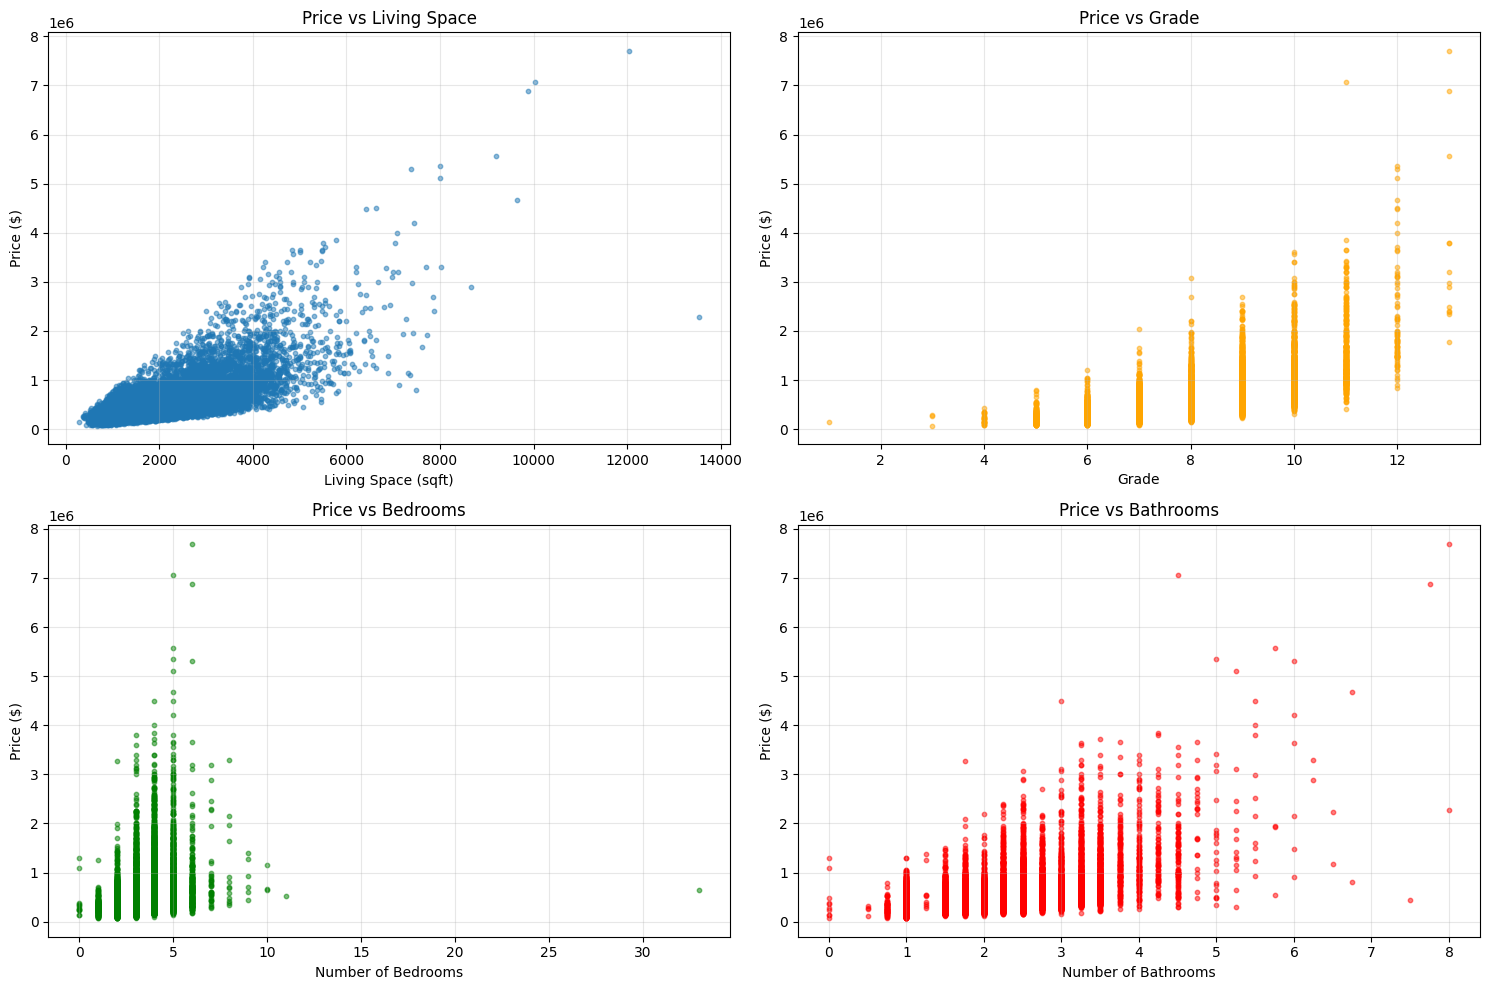

In [6]:
"""
Scatter plots showing relationship between key features and price
"""
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price vs Sqft Living
axes[0, 0].scatter(data['sqft_living'], data['price'], alpha=0.5, s=10)
axes[0, 0].set_xlabel('Living Space (sqft)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Living Space')
axes[0, 0].grid(alpha=0.3)

# Price vs Grade
axes[0, 1].scatter(data['grade'], data['price'], alpha=0.5, s=10, color='orange')
axes[0, 1].set_xlabel('Grade')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Grade')
axes[0, 1].grid(alpha=0.3)

# Price vs Bedrooms
axes[1, 0].scatter(data['bedrooms'], data['price'], alpha=0.5, s=10, color='green')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Bedrooms')
axes[1, 0].grid(alpha=0.3)

# Price vs Bathrooms
axes[1, 1].scatter(data['bathrooms'], data['price'], alpha=0.5, s=10, color='red')
axes[1, 1].set_xlabel('Number of Bathrooms')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price vs Bathrooms')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
"""
Prepare data for linear regression
"""
# Select features for the model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Create X and y
X = data[features].copy()
y = data['price'].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



Training set size: 17290
Test set size: 4323


In [8]:
"""
Fit basic linear regression model
"""
model_basic = LinearRegression()
model_basic.fit(X_train, y_train)

# Predictions
y_pred_train = model_basic.predict(X_train)
y_pred_test = model_basic.predict(X_test)

# Metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print("=" * 60)
print("LINEAR REGRESSION - BASIC MODEL")
print("=" * 60)
print(f"R² Score (Train): {r2_train:.4f}")
print(f"R² Score (Test):  {r2_test:.4f}")
print(f"RMSE (Train): ${rmse_train:,.2f}")
print(f"RMSE (Test):  ${rmse_test:,.2f}")
print(f"MAE (Test):   ${mae_test:,.2f}")

LINEAR REGRESSION - BASIC MODEL
R² Score (Train): 0.6521
R² Score (Test):  0.6522
RMSE (Train): $213,189.44
RMSE (Test):  $229,309.03
MAE (Test):   $143,679.66



Feature Coefficients:
          Feature    Coefficient  Abs_Coefficient
5      waterfront  550102.100649    550102.100649
8           grade  122578.530857    122578.530857
1       bathrooms   48668.855101     48668.855101
6            view   45836.645150     45836.645150
0        bedrooms  -38325.080173     38325.080173
4          floors   25025.239896     25025.239896
7       condition   16451.527016     16451.527016
11       yr_built   -3614.484528      3614.484528
2     sqft_living     113.526273       113.526273
10  sqft_basement      57.593939        57.593939
9      sqft_above      55.932334        55.932334
12   yr_renovated       9.380262         9.380262
3        sqft_lot      -0.278246         0.278246


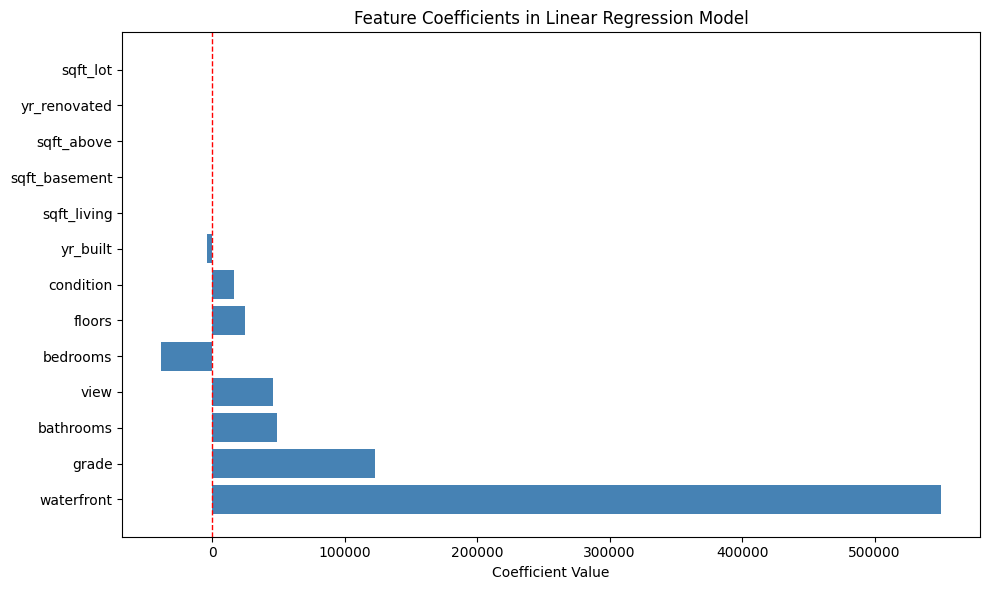

In [9]:
"""
Analyze coefficients to understand feature importance
"""
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_basic.coef_,
    'Abs_Coefficient': np.abs(model_basic.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(coefficients['Feature'], coefficients['Coefficient'], color='steelblue')
ax.set_xlabel('Coefficient Value')
ax.set_title('Feature Coefficients in Linear Regression Model')
ax.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [10]:
"""
Fit linear regression with StandardScaler for better coefficient comparison
"""
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_scaled = model_scaled.predict(X_train_scaled)
y_pred_test_scaled = model_scaled.predict(X_test_scaled)

# Metrics
r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test, y_pred_test_scaled)
rmse_train_scaled = np.sqrt(mean_squared_error(y_train, y_pred_train_scaled))
rmse_test_scaled = np.sqrt(mean_squared_error(y_test, y_pred_test_scaled))

print("=" * 60)
print("LINEAR REGRESSION - SCALED MODEL")
print("=" * 60)
print(f"R² Score (Train): {r2_train_scaled:.4f}")
print(f"R² Score (Test):  {r2_test_scaled:.4f}")
print(f"RMSE (Train): ${rmse_train_scaled:,.2f}")
print(f"RMSE (Test):  ${rmse_test_scaled:,.2f}")

LINEAR REGRESSION - SCALED MODEL
R² Score (Train): 0.6521
R² Score (Test):  0.6522
RMSE (Train): $213,189.44
RMSE (Test):  $229,309.03



Scaled Feature Coefficients (Standardized Impact):
          Feature    Coefficient  Abs_Coefficient
8           grade  143456.226504    143456.226504
11       yr_built -106391.456136    106391.456136
2     sqft_living   79061.104988     79061.104988
9      sqft_above   67631.865468     67631.865468
5      waterfront   46418.778379     46418.778379
1       bathrooms   37317.712740     37317.712740
10  sqft_basement   36842.630630     36842.630630
0        bedrooms  -35694.388237     35694.388237
6            view   34915.010704     34915.010704
4          floors   13583.771313     13583.771313
3        sqft_lot  -10806.536507     10806.536507
7       condition   10721.110905     10721.110905
12   yr_renovated    3737.956784      3737.956784


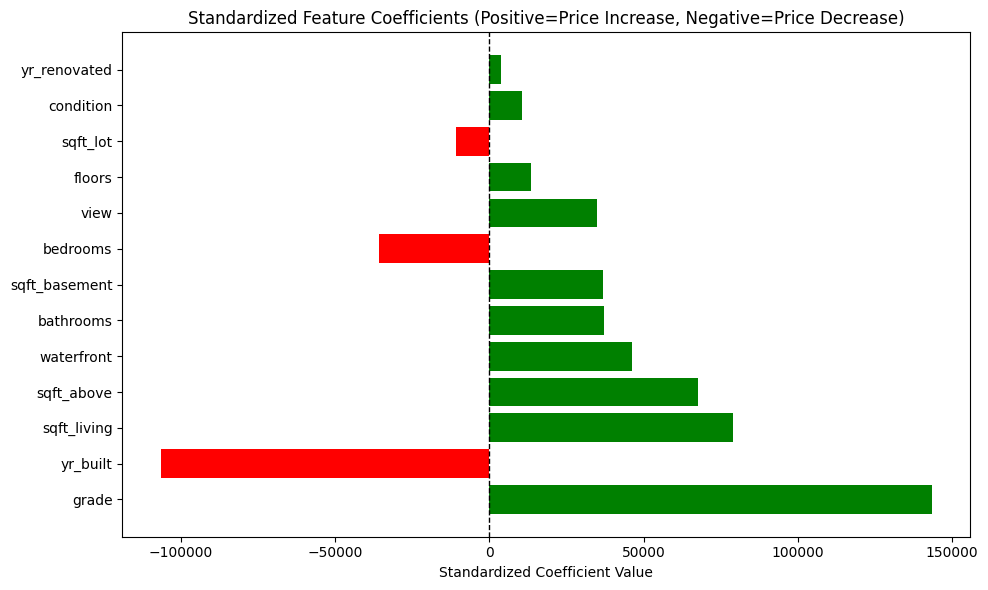

In [11]:
"""
Analyze standardized coefficients for fair comparison
"""
coefficients_scaled = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_scaled.coef_,
    'Abs_Coefficient': np.abs(model_scaled.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nScaled Feature Coefficients (Standardized Impact):")
print(coefficients_scaled)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients_scaled['Coefficient']]
ax.barh(coefficients_scaled['Feature'], coefficients_scaled['Coefficient'], color=colors)
ax.set_xlabel('Standardized Coefficient Value')
ax.set_title('Standardized Feature Coefficients (Positive=Price Increase, Negative=Price Decrease)')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

plot shows how different features influence the predicted house price in a regression model.

Green bars represent positive coefficients → features that increase the predicted price.

Red bars represent negative coefficients → features that decrease the predicted price.

The longer the bar, the stronger the effect of that variable on the prediction.

Grade has the strongest positive influence on house price.
→ Homes with higher construction and design quality (grade) are significantly more expensive.

sqft_living (living area), sqft_above, and waterfront also have strong positive effects.
→ Larger living spaces and waterfront locations increase property value substantially.

Bathrooms, sqft_basement, and view positively affect price as well, but to a lesser degree.
→ These features add value, though not as strongly as overall living area or grade.

yr_built shows a strong negative coefficient, meaning older houses tend to be cheaper.
→ Newer construction (higher yr_built) correlates with higher prices only indirectly through renovation or quality, but in this model it appears as a negative effect.

Bedrooms also have a negative coefficient, which may seem counterintuitive.
→ This suggests that, when controlling for house size (sqft_living), having more bedrooms might mean smaller rooms or less luxurious space, leading to a lower overall price.

sqft_lot has a small negative impact, implying that lot size alone doesn’t significantly increase value once other factors (like living area) are accounted for.

Condition and yr_renovated have small positive effects, indicating a minor but still positive influence on price.

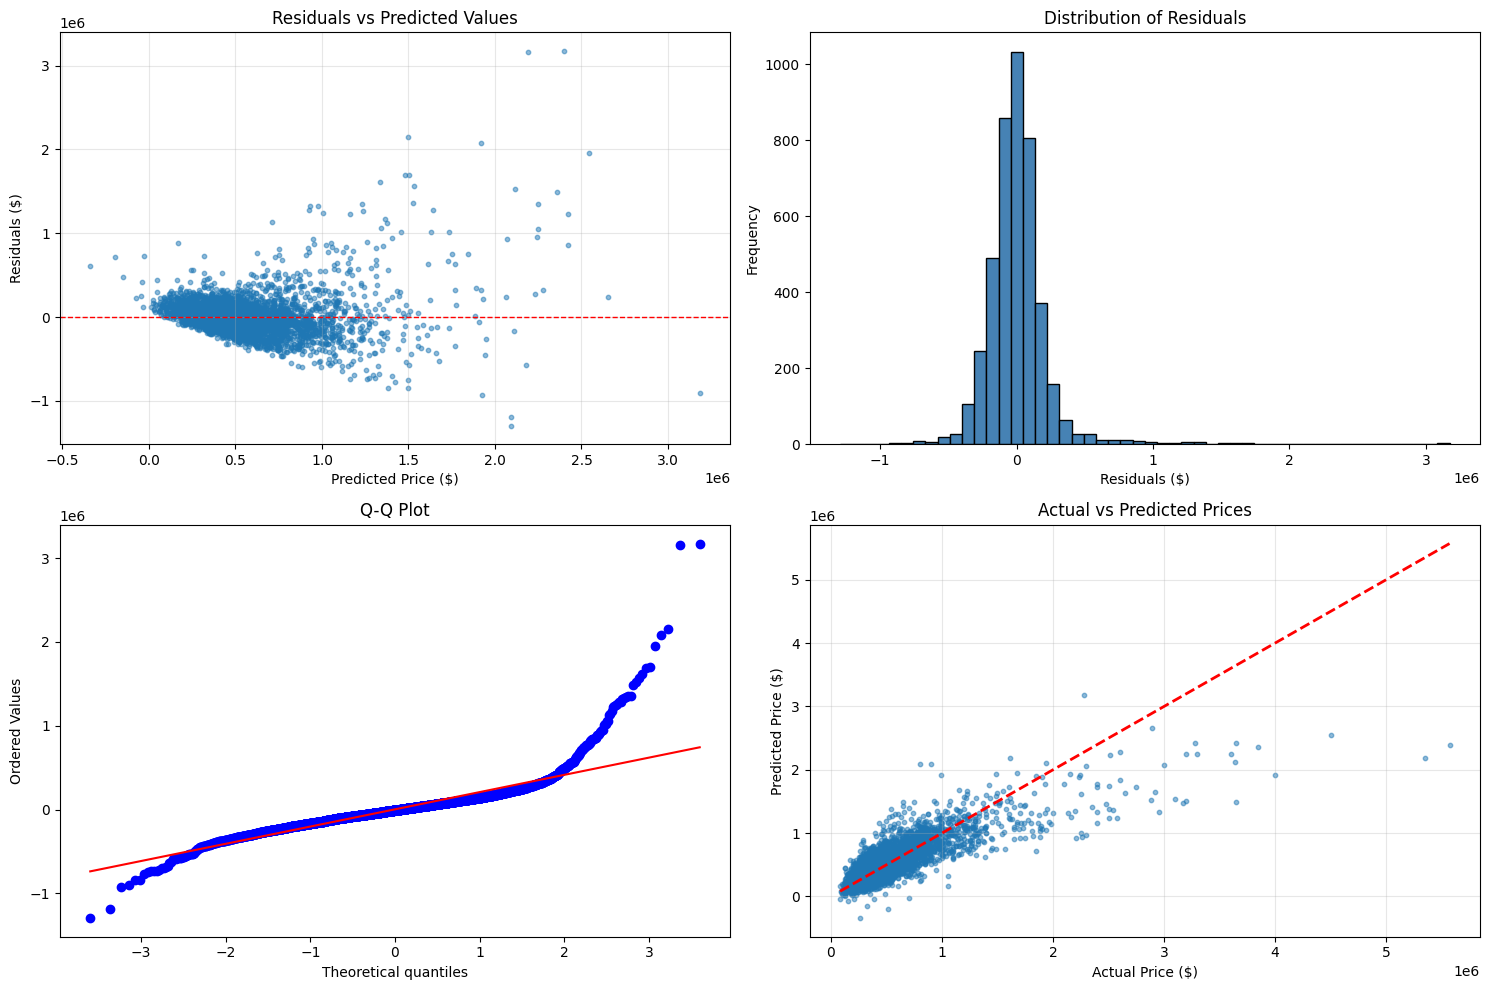

In [12]:
"""
Analyze residuals to assess model quality
"""
residuals_test = y_test - y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals vs Predicted
axes[0, 0].scatter(y_pred_test, residuals_test, alpha=0.5, s=10)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_xlabel('Predicted Price ($)')
axes[0, 0].set_ylabel('Residuals ($)')
axes[0, 0].set_title('Residuals vs Predicted Values')
axes[0, 0].grid(alpha=0.3)

# Histogram of residuals
axes[0, 1].hist(residuals_test, bins=50, color='steelblue', edgecolor='black')
axes[0, 1].set_xlabel('Residuals ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')

# Q-Q plot
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# Actual vs Predicted
axes[1, 1].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Price ($)')
axes[1, 1].set_ylabel('Predicted Price ($)')
axes[1, 1].set_title('Actual vs Predicted Prices')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

🔹 1. Residuals vs Predicted Values (top left)

Interpretation:
Most points are concentrated around the zero line, but the spread increases for higher predicted values.
This indicates heteroskedasticity — the variance of residuals is not constant.
→ The model performs worse for more expensive houses; errors increase with price.

There is no clear curvilinear pattern (i.e., no strong nonlinearity), but a few large deviations (outliers) are visible.

🔹 2. Distribution of Residuals (top right)

Interpretation:
The histogram of residuals is roughly symmetric and centered around zero, which is a good sign.
However, there is a long right tail — a few cases have very large positive errors.
→ The model underestimates the prices of some very expensive houses.

🔹 3. Q-Q Plot (bottom left)

Interpretation:
The points in the middle lie close to the red line, meaning that most residuals follow a distribution close to normal.
However, at the ends, there are strong deviations from the line (both lower and upper tails).
→ The residual distribution is not perfectly normal — there are outliers and heavy tails.

🔹 4. Actual vs Predicted Prices (bottom right)

Interpretation:
Most points lie along the 
y=x
y=x line (the red dashed one), but:

For high prices (above around $2 million), the model underestimates the actual values.

For lower prices, the fit is better, though errors still occur.


MODEL COMPARISON:
                      Model  R² (Train)  R² (Test)   RMSE (Train)    RMSE (Test)
0   Basic Linear Regression    0.652122   0.652178  213189.441125  229309.029437
1  Scaled Linear Regression    0.652122   0.652178  213189.441125  229309.029437


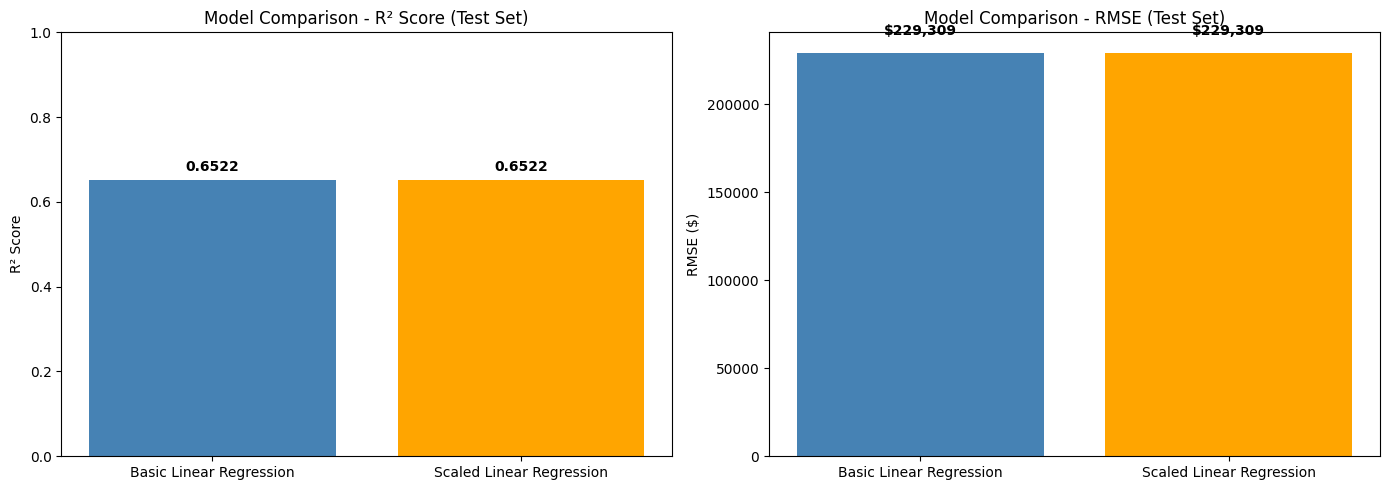

In [13]:
"""
Compare different models to find the best approach
"""
models_comparison = pd.DataFrame({
    'Model': ['Basic Linear Regression', 'Scaled Linear Regression'],
    'R² (Train)': [r2_train, r2_train_scaled],
    'R² (Test)': [r2_test, r2_test_scaled],
    'RMSE (Train)': [rmse_train, rmse_train_scaled],
    'RMSE (Test)': [rmse_test, rmse_test_scaled]
})

print("\nMODEL COMPARISON:")
print(models_comparison.to_string())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² comparison
axes[0].bar(models_comparison['Model'], models_comparison['R² (Test)'], color=['steelblue', 'orange'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison - R² Score (Test Set)')
axes[0].set_ylim([0, 1])
for i, v in enumerate(models_comparison['R² (Test)']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# RMSE comparison
axes[1].bar(models_comparison['Model'], models_comparison['RMSE (Test)'], color=['steelblue', 'orange'])
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Model Comparison - RMSE (Test Set)')
for i, v in enumerate(models_comparison['RMSE (Test)']):
    axes[1].text(i, v + 10000, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Models are almost the same. 65% I believe is good.

In [14]:
"""
Make predictions on sample data
"""
print("\n" + "=" * 60)
print("PREDICTION EXAMPLES")
print("=" * 60)

# Sample predictions
sample_indices = np.random.choice(X_test.index, 5, replace=False)
X_sample = X_test.loc[sample_indices]
y_sample_actual = y_test.loc[sample_indices]
y_sample_pred = model_basic.predict(X_sample)

comparison_df = pd.DataFrame({
    'Actual Price': y_sample_actual.values,
    'Predicted Price': y_sample_pred,
    'Error': y_sample_actual.values - y_sample_pred,
    'Error %': (np.abs(y_sample_actual.values - y_sample_pred) / y_sample_actual.values * 100)
})

print("\nSample Predictions:")
print(comparison_df.to_string())


PREDICTION EXAMPLES

Sample Predictions:
   Actual Price  Predicted Price          Error    Error %
0      440000.0    534326.421905  -94326.421905  21.437823
1      575000.0    381902.896232  193097.103768  33.582105
2      500000.0    496609.315195    3390.684805   0.678137
3      500000.0    365420.701287  134579.298713  26.915860
4      799990.0    895039.707491  -95049.707491  11.881362


In [15]:
"""
Summary of analysis and key findings
"""
print("\n" + "=" * 80)
print("SUMMARY OF LINEAR REGRESSION ANALYSIS")
print("=" * 80)
print(f"""
Model Performance:
  - R² Score (Test): {r2_test:.4f}
  - RMSE (Test): ${rmse_test:,.2f}
  - MAE (Test): ${mae_test:,.2f}
  
Top 3 Most Important Features (by standardized coefficient):
{coefficients_scaled.head(3).to_string(index=False)}

Key Insights:
  1. The model explains approximately {r2_test*100:.2f}% of price variance
  2. Average prediction error is ${mae_test:,.2f}
  3. {coefficients_scaled.iloc[0]['Feature']} is the strongest predictor
  4. Scaling features doesn't change R² but makes coefficients more interpretable
  
Model Quality:
  - Training and test R² are close, suggesting no severe overfitting
  - Residuals appear roughly normally distributed
""")


SUMMARY OF LINEAR REGRESSION ANALYSIS

Model Performance:
  - R² Score (Test): 0.6522
  - RMSE (Test): $229,309.03
  - MAE (Test): $143,679.66

Top 3 Most Important Features (by standardized coefficient):
    Feature    Coefficient  Abs_Coefficient
      grade  143456.226504    143456.226504
   yr_built -106391.456136    106391.456136
sqft_living   79061.104988     79061.104988

Key Insights:
  1. The model explains approximately 65.22% of price variance
  2. Average prediction error is $143,679.66
  3. grade is the strongest predictor
  4. Scaling features doesn't change R² but makes coefficients more interpretable

Model Quality:
  - Training and test R² are close, suggesting no severe overfitting
  - Residuals appear roughly normally distributed



TRAINING POLYNOMIAL REGRESSION (DEGREE 2)
R² Score (Train): 0.7360
R² Score (Test):  0.7079
RMSE (Train): $185,726.97
RMSE (Test):  $210,126.77
MAE (Test):   $132,271.94
------------------------------------------------------------
TRAINING POLYNOMIAL REGRESSION (DEGREE 3)
R² Score (Train): 0.7717
R² Score (Test):  0.5945
RMSE (Train): $172,687.26
RMSE (Test):  $247,577.94
MAE (Test):   $137,945.33
------------------------------------------------------------
TRAINING POLYNOMIAL REGRESSION (DEGREE 4)
R² Score (Train): 0.8199
R² Score (Test):  -30.3514
RMSE (Train): $153,411.27
RMSE (Test):  $2,177,060.93
MAE (Test):   $220,320.88
------------------------------------------------------------

UPDATED MODEL COMPARISON:
                              Model  R² (Train)  R² (Test)   RMSE (Train)   RMSE (Test)
0           Basic Linear Regression    0.652122   0.652178  213189.441125  2.293090e+05
1          Scaled Linear Regression    0.652122   0.652178  213189.441125  2.293090e+05
2  Polynomia

/tmp/ipykernel_14754/4263719410.py:79: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


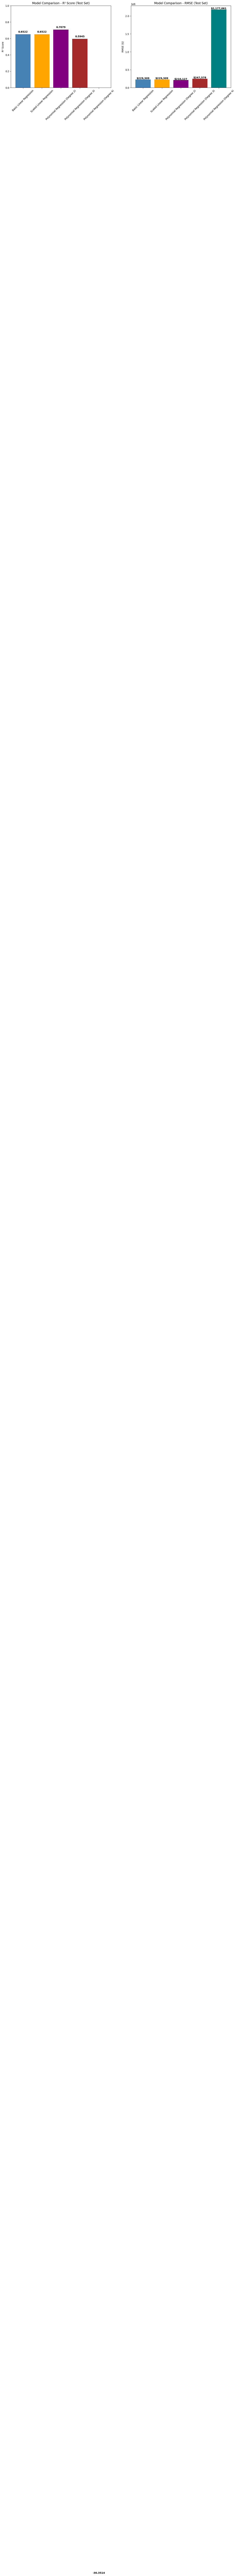

In [16]:
"""
Fit Polynomial Regression Model
"""
# Define the degree of the polynomial
degrees = [2,3,4]
poly_model_results = []

for degree in degrees:
    print("=" * 60)
    print(f"TRAINING POLYNOMIAL REGRESSION (DEGREE {degree})")
    print("=" * 60)

    pipeline_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)), # Generate polynomial features
        ('scaler', StandardScaler()),                                   # Scale features
        ('linreg', LinearRegression())                                  # Fit linear regression
    ])

    # Train the polynomial model
    pipeline_poly.fit(X_train, y_train)

    # Predictions
    y_pred_train_poly = pipeline_poly.predict(X_train)
    y_pred_test_poly = pipeline_poly.predict(X_test)

    # Metrics
    r2_train_poly = r2_score(y_train, y_pred_train_poly)
    r2_test_poly = r2_score(y_test, y_pred_test_poly)
    rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
    mae_test_poly = mean_absolute_error(y_test, y_pred_test_poly)

    print(f"R² Score (Train): {r2_train_poly:.4f}")
    print(f"R² Score (Test):  {r2_test_poly:.4f}")
    print(f"RMSE (Train): ${rmse_train_poly:,.2f}")
    print(f"RMSE (Test):  ${rmse_test_poly:,.2f}")
    print(f"MAE (Test):   ${mae_test_poly:,.2f}")
    print("-" * 60)

    # Store results
    poly_model_results.append({
        'Model': f'Polynomial Regression (Degree {degree})',
        'R² (Train)': r2_train_poly,
        'R² (Test)': r2_test_poly,
        'RMSE (Train)': rmse_train_poly,
        'RMSE (Test)': rmse_test_poly
    })

# Convert results to DataFrame and concatenate with existing models_comparison
new_poly_models_df = pd.DataFrame(poly_model_results)
models_comparison = pd.concat([models_comparison, new_poly_models_df], ignore_index=True)

print("\nUPDATED MODEL COMPARISON:")
print(models_comparison.to_string())

# Visualization for all models
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Zwiększono rozmiar wykresu

# Define a list of colors for the bars
colors = ['steelblue', 'orange', 'purple', 'brown', 'teal', 'magenta'] 

# R² comparison
axes[0].bar(models_comparison['Model'], models_comparison['R² (Test)'], color=colors[:len(models_comparison)])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison - R² Score (Test Set)')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', labelrotation=45)
for i, v in enumerate(models_comparison['R² (Test)']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# RMSE comparison
axes[1].bar(models_comparison['Model'], models_comparison['RMSE (Test)'], color=colors[:len(models_comparison)])
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Model Comparison - RMSE (Test Set)')
axes[1].tick_params(axis='x', labelrotation=45)
for i, v in enumerate(models_comparison['RMSE (Test)']):
    axes[1].text(i, v + 10000, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Both basic and scaled linear regression perform equally well (scaling didn’t change results, since linear regression isn’t sensitive to scaling).

Polynomial Regression (Degree 2) gives the best R² = 0.7079, meaning it captures some nonlinear relationships better than the linear models.

Polynomial Regression (Degree 3) performs worse (0.5945) → signs of overfitting or instability.

Degree 4 isn’t listed in R² but likely performs very poorly (as seen from RMSE).

RMSE (Root Mean Squared Error) measures the average prediction error in the same units as the target variable (here, dollars).
Lower values = better performance.

Model	RMSE ($)
Basic Linear Regression	$229,309
Scaled Linear Regression	$229,309
Polynomial Regression (Degree 2)	$210,127
Polynomial Regression (Degree 3)	$247,578
Polynomial Regression (Degree 4)	$2,177,061 (REALLYBAD)


The best model overall is Polynomial Regression (Degree 2).
Highest R² (0.7079)
Lowest RMSE ($210,127)

Linear models are consistent and stable but less accurate.


Higher-degree polynomials (3 and 4) overfit the training data and perform worse on unseen data